In [89]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
# import acc and mcc
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import matthews_corrcoef as MCC
import itertools

In [90]:
def plot_confusion_matrix(cm, class_names, acc, mcc):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
        cm (array, shape = [n, n]): a confusion matrix of integer classes
        class_names (array, shape = [n]): String names of the integer classes

    Returns:
        The figure of the confusion matrix
    """
    figure = plt.figure(figsize=(8, 8))
    cm_normal = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    cm_normal[np.isnan(cm_normal)] = 0
    plt.imshow(cm_normal, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion matrix (Acc: {np.round(np.mean(acc), 3)}, Mcc: {np.round(np.mean(mcc), 3)})")
    plt.colorbar()
    # plt.grid(b=None)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    # labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = 0.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm_normal[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color, fontsize=8)

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return figure



In [91]:
group = 'valid'
table_0 = pd.read_csv(
    f'/home/simonp/MSML3/results/multi/mz10/rt10/ms2/200spd/thr0.0/all/b14-b13-b12-b11-b10-b9-b8-b7-b6-b5-b4-b3-b2-b1_binary0_-1_gkf0_ovr0_mz0-10000rt0-320_na_h/xgboost/saved_models/xgboost_{group}_individual_results_0.csv',
    index_col=0
)
table_06 = pd.read_csv(
    f'/home/simonp/MSML3/results/multi/mz10/rt10/ms2/200spd/thr0.0/all/b14-b13-b12-b11-b10-b9-b8-b7-b6-b5-b4-b3-b2-b1_binary0_-1_gkf0_ovr0_mz0-10000rt0-320_na_h/xgboost/saved_models/xgboost_{group}_individual_results_0.6.csv',
    index_col=0
)


# No threshold, all classes

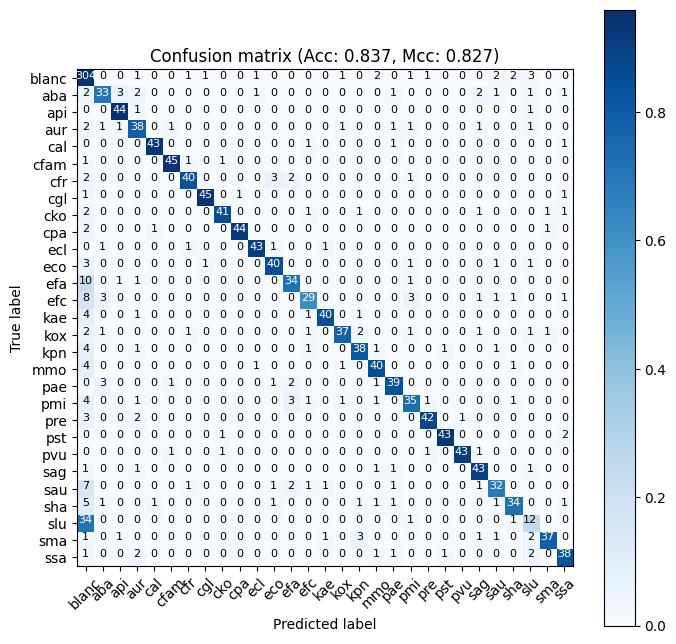

In [92]:
# Make cofusion matrix using sklearn
unique_labels = np.unique(table_0.loc[:, 'labels'])
blanc_class = np.argwhere(unique_labels == 'blanc').flatten()[0]
unique_labels = np.concatenate((['blanc'], np.delete(unique_labels, blanc_class)))
cm = confusion_matrix(table_0.loc[:, 'labels'], table_0.loc[:, 'preds'], labels=unique_labels)
# Display the confusion matrix as a plot
acc = ACC(table_0.loc[:, 'labels'], table_0.loc[:, 'preds'])
mcc = MCC(table_0.loc[:, 'labels'], table_0.loc[:, 'preds'])
# place blancs first


disp = plot_confusion_matrix(cm, unique_labels, acc, mcc)

# Plot the confusion matrix
# plt.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
plt.show()

# NO THRESHOLD, no slu

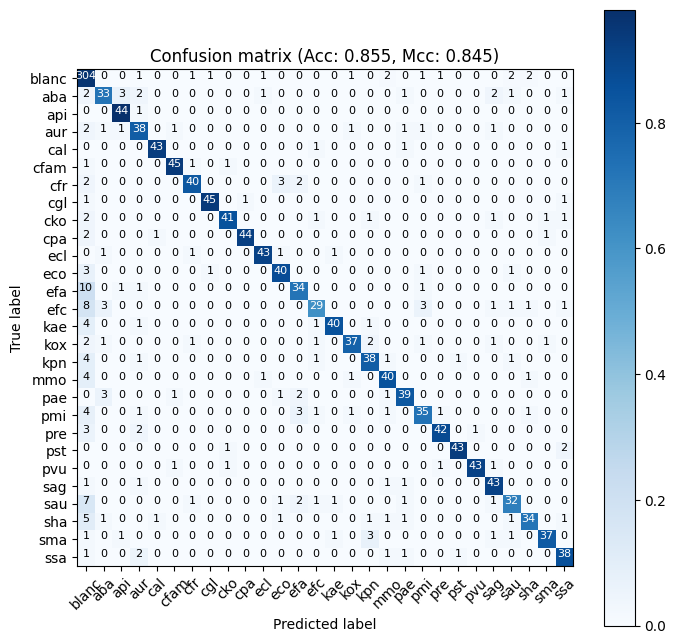

In [93]:
table_0 = table_0[table_0['labels'] != 'slu']
# Make cofusion matrix using sklearn
unique_labels = np.unique(table_0.loc[:, 'labels'])
blanc_class = np.argwhere(unique_labels == 'blanc').flatten()[0]
unique_labels = np.concatenate((['blanc'], np.delete(unique_labels, blanc_class)))
cm = confusion_matrix(table_0.loc[:, 'labels'], table_0.loc[:, 'preds'], labels=unique_labels)
# Display the confusion matrix as a plot
acc = ACC(table_0.loc[:, 'labels'], table_0.loc[:, 'preds'])
mcc = MCC(table_0.loc[:, 'labels'], table_0.loc[:, 'preds'])
# place blancs first


disp = plot_confusion_matrix(cm, unique_labels, acc, mcc)

# Plot the confusion matrix
# plt.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
plt.show()

# Threshold at 60%, all classes

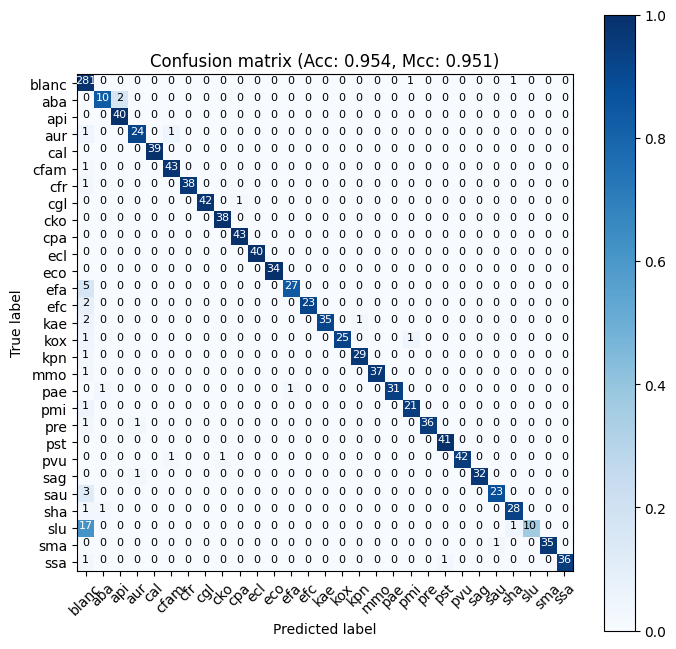

In [94]:
# Make cofusion matrix using sklearn
unique_labels = np.unique(table_06.loc[:, 'labels'])
blanc_class = np.argwhere(unique_labels == 'blanc').flatten()[0]
unique_labels = np.concatenate((['blanc'], np.delete(unique_labels, blanc_class)))
cm = confusion_matrix(table_06.loc[:, 'labels'], table_06.loc[:, 'preds'], labels=unique_labels)
# Display the confusion matrix as a plot
acc = ACC(table_06.loc[:, 'labels'], table_06.loc[:, 'preds'])
mcc = MCC(table_06.loc[:, 'labels'], table_06.loc[:, 'preds'])
# place blancs first


disp = plot_confusion_matrix(cm, unique_labels, acc, mcc)

# Plot the confusion matrix
# plt.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
plt.show()

# Threshold at 60%, no slu

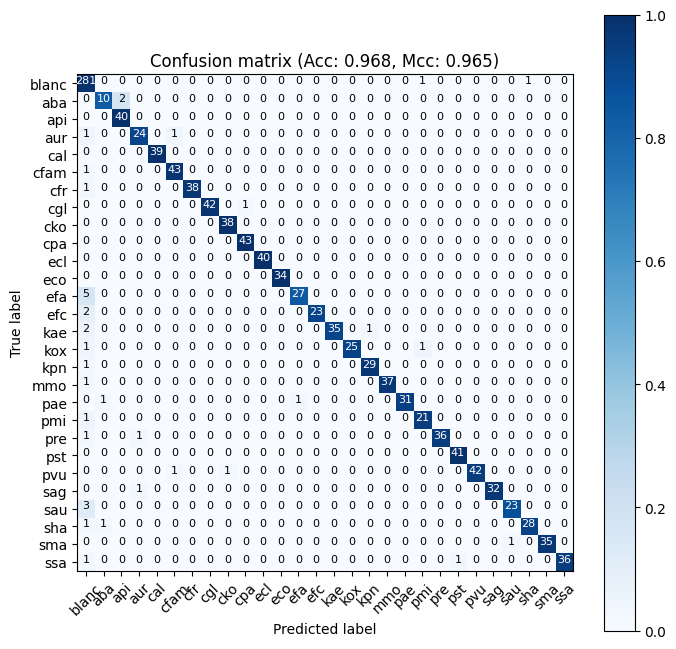

In [95]:
# Remove slu
table_06 = table_06[table_06['labels'] != 'slu']
# Make cofusion matrix using sklearn
unique_labels = np.unique(table_06.loc[:, 'labels'])
blanc_class = np.argwhere(unique_labels == 'blanc').flatten()[0]
unique_labels = np.concatenate((['blanc'], np.delete(unique_labels, blanc_class)))
cm = confusion_matrix(table_06.loc[:, 'labels'], table_06.loc[:, 'preds'], labels=unique_labels)
# Display the confusion matrix as a plot
acc = ACC(table_06.loc[:, 'labels'], table_06.loc[:, 'preds'])
mcc = MCC(table_06.loc[:, 'labels'], table_06.loc[:, 'preds'])
# place blancs first


disp = plot_confusion_matrix(cm, unique_labels, acc, mcc)

# Plot the confusion matrix
# plt.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
plt.show()